<hr/>

# Foundations of Reinforcement Learning

<hr/>

<h1><font color="darkblue">Lab 3: Dynamic Programming  </font></h1>





##  Content
1. Gym environment
2. Dynamic Programming



## 1. Gym library


Gym is a toolkit for developing and comparing reinforcement learning algorithms, (see https://gym.openai.com/). A bunch of [classic RL problems](https://gym.openai.com/envs/#classic_control) could be easily simulated. In particular, Gym environment provid all necessary variables (e.g. current state, next state and step reward) and the only thing remains you to do is choosing actions base on different algorithums, (please read https://gym.openai.com/docs/ for more details).

Run the following code to install:

In [7]:
!pip install gym

In [8]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import gym
from IPython import display
import random

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/Users/alecportelli/anaconda3/lib/python3.10/site-packages/IPython/core/magics/pylab.py:162: UserWarning: pylab import has clobbered these variables: ['gamma']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


## 2. Dynamic Programming (GridWorld)

### 2.1 Intro to GridWorld

In this section, we apply policy iteration and value iteration for gridworld problem. 

The grid is shown below, the black tiles represents wall/obstacles, the white tiles are the non-terminal tiles, and the tile with "s" is the starting point of every episoid, the tile with "5" is the goal point.

The agent start at "s" tile. At every step, the agent can choose one of the four actions:"up","right","down","left", moving to the next tile in that direction. 

$\cdot$ If the next tile is wall/obstacle, the agent does not move and receive -1 reward;

$\cdot$ If the next tile is a non-terminal tile, the agent move to that tile and receive 0 reward;

$\cdot$ If the next tile is the goal tile, the episoid is finished and the agent receive 5 reward.

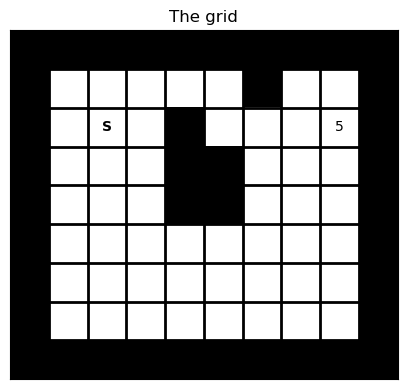

In [9]:
from gridworld import GridWorld

gw = GridWorld()
gw.plot_grid(plot_title='The grid')

### 2.1.1 States and state values
Excluding the wall around the grid, there are 56 tiles (INCLUDING obstacles inside the grid), and they correspond to 56 states (obstacles and goal are non-reachable states).

We use numbers from 0 to 55 to represent these states (see gridworld.py for the coversion between integer and tile position). The correspondance are as shown below:

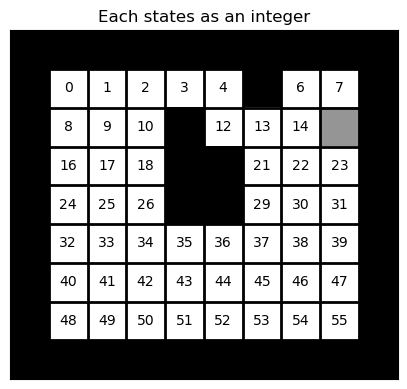

In [10]:
gw.plot_state_values(np.arange(56),value_format="{:d}",plot_title='Each states as an integer')

### 2.1.2 Take actions
Use GridWorld.step(action) to take an action, and use GridWorld.reset() to restart an episoid

action is an integer from 0 to 3

0: "Up"; 1: "Right"; 2: "Down"; 3: "Left" 

In [11]:
gw.reset()

current_state = gw.get_current_state()
tile_pos = gw.int_to_state(current_state)

print("The current state is {}, which corresponds to tile position {}\n".format(current_state,tile_pos))

action = np.random.randint(4)
reward, terminated, next_state = gw.step(action)
tile_pos = gw.int_to_state(next_state)

print("Take action {}, get reward {}, move to state {}".format(action,reward,next_state))
print("Now the current state is {}, which corresponds to tile position {}\n".format(next_state,tile_pos))

gw.reset()
current_state = gw.get_current_state()
tile_pos = gw.int_to_state(current_state)
print("Reset episoid")
print("Now the current state is {}, which corresponds to tile position {}".format(current_state,tile_pos))



The current state is 9, which corresponds to tile position (1, 1)

Take action 3, get reward 0.0, move to state 8
Now the current state is 8, which corresponds to tile position (1, 0)

Reset episoid
Now the current state is 9, which corresponds to tile position (1, 1)


### 2.1.3 Plot Deterministic Policies
A deterministic policy is a function from state to action, which can be represented by a (56,)-numpy array whose entries are all integers in (0-3)

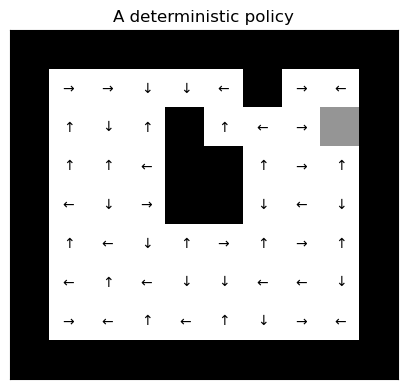

In [12]:
gw.plot_policy(np.random.randint(4,size=(56,)),plot_title='A deterministic policy')

### 2.2 Policy Evaluation

Recall that the value function $v_\pi(s)$ of a policy $\pi(s)$ can be iteratively computed via Policy Evaluation (See Sutton&Barto Section 4.1), the iteration is given by $$v_{k+1}(s)=\sum_{a}\pi(a|s)\sum_{s',r}p(s',r|s,a)[r+\gamma v_{k}(s)]\,,$$ which can be written as $$
    v_{k+1}(s)=\sum_{a}\pi(a|s)\left[\mathbb{E}_\pi[r|s,a]+\sum_{s'}p(s'|s,a)v_k(s')\right]\,.
$$
If we write value function $v_{k+1},v_k$ as vectors, then we have
$$
    v_{k+1} = \sum_{a}\pi(a|s)\left[R_\pi(a)+P_\pi(a)v_{k}\right]\,.
$$
where $R_\pi(a)$ is the expected reward under action $a$ and  $P_\pi(a)$ is the transition probability matrix under action $a$. 

With this we can find the value function $v_\pi$ of random policy $\pi$ when discount is 0.9, the code is shown below



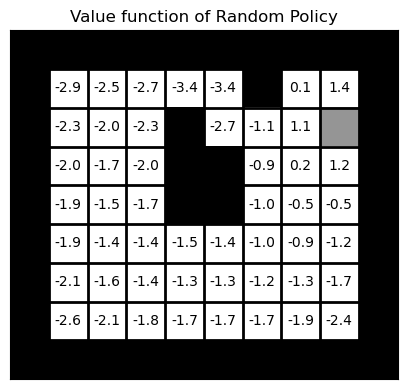

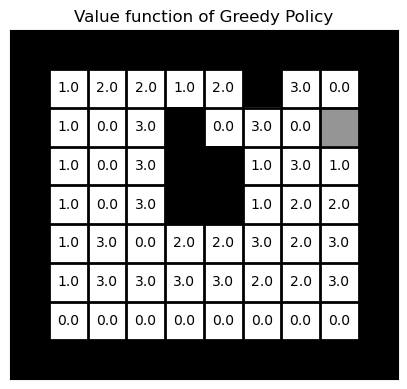

In [13]:
pi_a = [0.25,0.25,0.25,0.25] # action proability of random action (for any state)

# Lists for rewards and tran probs at state action spaces
tran_prob_list = []
reward_list = [] # 4 lists for 4 different actions 

gamma = 0.9
max_it = 1000
tol = 1e-5
v = np.zeros((56,))
for i in range(max_it):
    value_temp = np.zeros((56,))
    for action in range(4):
        reward, tran_prob = gw.transition(action)
        value_temp = value_temp + pi_a[action]*(reward+gamma* np.matmul(tran_prob,v))

        # Add to lists for each state action 
        tran_prob_list.append(tran_prob)
        reward_list.append(reward)
    if np.linalg.norm(value_temp-v)<tol:
        break
    else:
        v = value_temp
        
v_final = v
tran_prob_list = np.asarray(tran_prob_list)
reward_list = np.asarray(reward_list)

gw.plot_state_values(v,value_format="{:.1f}",plot_title='Value function of Random Policy')

# compute and plot the greedy policy of this value function (Hint: first compute Q from v)

# write your code here
''' Calculate Q from v '''
num_states = 56
num_actions = 4
Q = np.zeros((num_states, num_actions))

# Compute Q from v
for s in range(num_states):
    for a in range(num_actions):
        q_sa = 0
        for s_prime in range(num_states):
            q_sa += tran_prob_list[a, s_prime, s] * (reward_list[s, s_prime] + gamma * v_final[s_prime])
        Q[s, a] = q_sa

# Make into greedy policy
policy = np.zeros(num_states, dtype=int)
for s in range(num_states):
    # Choose the action that maximizes the Q-value
    policy[s] = np.argmax(Q[s])

gw.plot_state_values(policy,value_format="{:.1f}",plot_title='Value function of Greedy Policy')

### 2.3 Value Iteration

Implement Value Iteration Algorithm (Sutton&Barto Section 4.4) to find the optimal policy of this gridworld, and plot its value function


In [14]:
# Value Iteration Algorithm
import numpy as np
import matplotlib.pyplot as plt

def value_iteration(gridworld, gamma, plot=False):
# input:  gridworld, (GridWorld class) gridworld class describing the environment
#         gamma,     (float 0-1) discount of the return
# output: optim value,  (1d numpy array, float) optimal value function 
#         optim_policy, (1d numpy array, int {0,1,2,3}) optimal policy

# write your code here

    # Define gridworld parameters
    num_rows = gridworld._grid.shape[0]     # Number of rows
    num_cols = gridworld._grid.shape[1]     # Number of columns
    num_states = num_rows * num_cols        # Total number of states
    num_actions = 4                         # Number of possible actions (up, down, left, right)
    theta = 0.01                            # Convergence threshold

    # Initialize value function and policy
    V = np.zeros(num_states)  
    optim_policy = np.zeros(num_states, dtype=int)

    # Define the gridworld's transition
    P = np.zeros((num_states, num_states, num_actions))

    # Define the immediate rewards
    R = -0.1 * np.ones((num_states, num_states))       # Default negative reward for each transition
    goal_state = num_states - 41                       # Puts the goal in same position as original gridworld 
    R[goal_state, goal_state] = 1.0                    # Positive reward for reaching the goal

    # Define the transition 
    for s in range(num_states):
        for a in range(num_actions):
            s_prime = get_next_state(s, a, num_rows=num_rows, num_cols=num_cols)
            P[s_prime, s, a] = 1.0

    # Loop until convergence
    while True:
        delta = 0
        for s in range(num_states):
            v = V[s]
            Q = np.zeros(num_actions)
            for a in range(num_actions):
                # Calculate Q-value 
                for s_prime in range(num_states):
                    Q[a] += P[s_prime, s, a] * (R[s, s_prime] + gamma * V[s_prime])

            # Update value function
            V[s] = max(Q)
            delta = max(delta, abs(v - V[s]))

        # Check threshold 
        if delta < theta:
            break

    # Set optimal value
    optim_value = V

    # Build optimal policy 
    for s in range(num_states):
        Q = np.zeros(num_actions)
        for a in range(num_actions):
            for s_prime in range(num_states):
                Q[a] += P[s_prime, s, a] * (R[s, s_prime] + gamma * V[s_prime])
        optim_policy[s] = np.argmax(Q)

    # Visualize the value function and the optimal policy
    if plot:
        plt.figure(figsize=(8, 7))
        plt.imshow(V.reshape(num_rows, num_cols), cmap='coolwarm', interpolation='none')
        plt.colorbar()
        plt.title('Value Function')
        plt.xticks([])
        plt.yticks([])

        arrows = ['↑', '↓', '←', '→']
        for i, action in enumerate(optim_policy):
            plt.text(i % num_cols, i // num_cols, arrows[action], ha='center', va='center', fontsize=12, weight='bold')
        plt.show()

    return optim_policy, optim_value

# Helper function to get the next state 
def get_next_state(s, a, num_rows, num_cols):
    row, col = s // num_cols, s % num_cols
    if a == 0:  # Up
        new_row = max(row - 1, 0)
        new_col = col
    elif a == 1:  # Down
        new_row = min(row + 1, num_rows - 1)
        new_col = col
    elif a == 2:  # Left
        new_row = row
        new_col = max(col - 1, 0)
    else:  # Right
        new_row = row
        new_col = min(col + 1, num_cols - 1)
    return new_row * num_cols + new_col


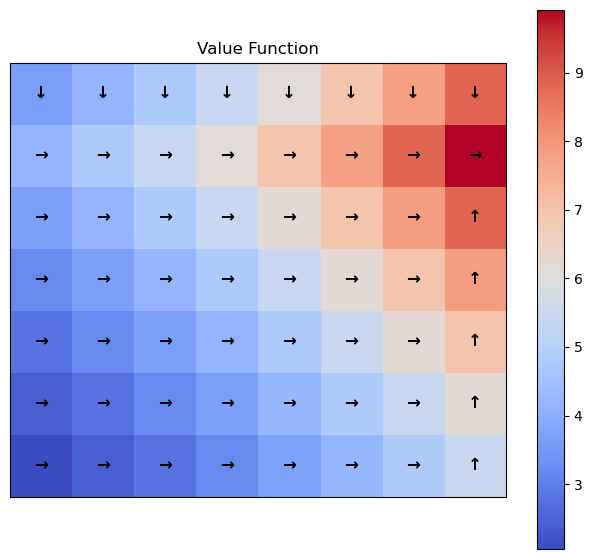

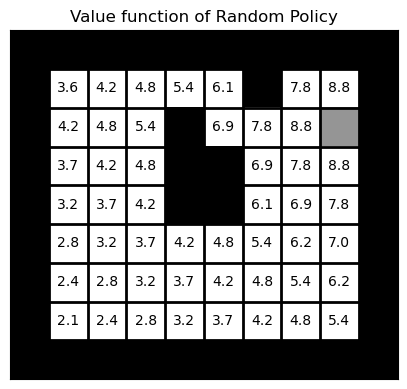

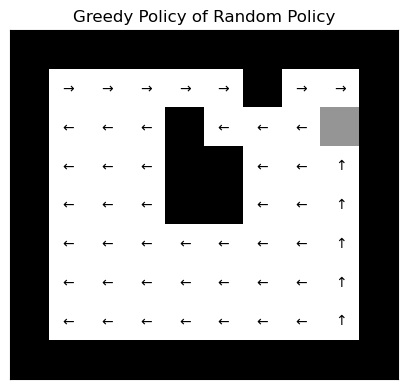

In [15]:
# check your result here
optim_policy, optim_value = value_iteration(gw, 0.9, plot=True)
gw.plot_state_values(optim_value, value_format="{:.1f}",plot_title='Value function of Random Policy')
gw.plot_policy(optim_policy,plot_title='Greedy Policy of Random Policy')